In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, measure, morphology
from skimage.segmentation import flood
import matplotlib.pyplot as plt
from skimage import io

In [2]:
!git clone https://github.com/byrkbrk/unet-implementation.git

Cloning into 'unet-implementation'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 126 (delta 64), reused 24 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (126/126), 17.75 MiB | 21.11 MiB/s, done.
Resolving deltas: 100% (64/64), done.


volumes shape: (30, 512, 512)
labels shape: (30, 512, 512)


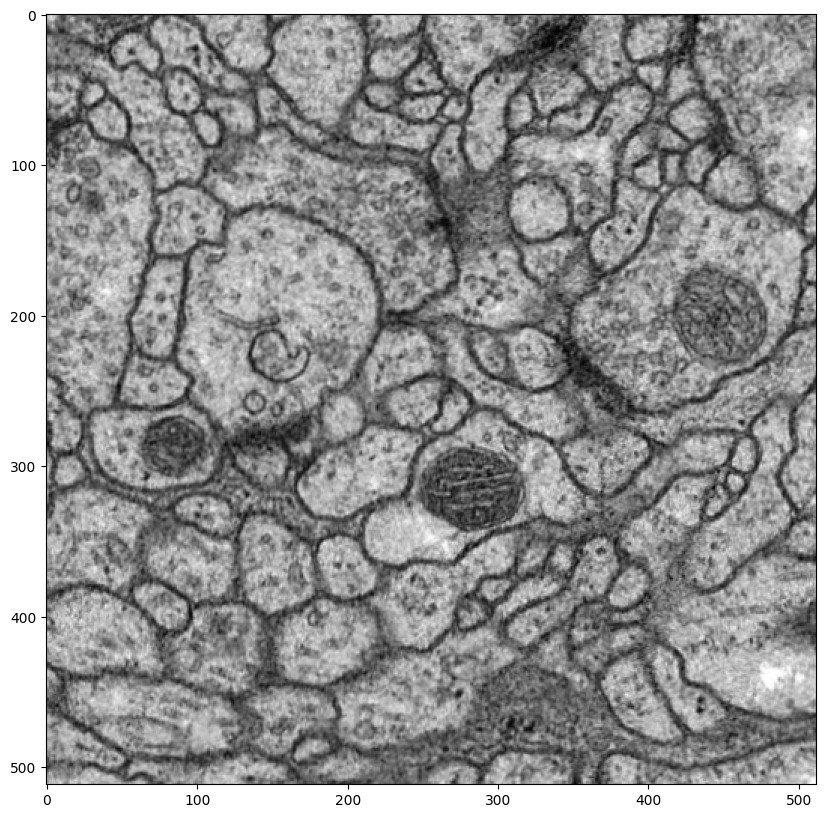

In [3]:
dir = "./unet-implementation/"
volumes = io.imread(dir + "train-volume.tif")
labels = io.imread(dir + "train-labels.tif")

img = volumes[2].astype(float)

# print shapes
print("volumes shape:", volumes.shape)
print("labels shape:", labels.shape)

# plot images
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap="gray")
plt.show()

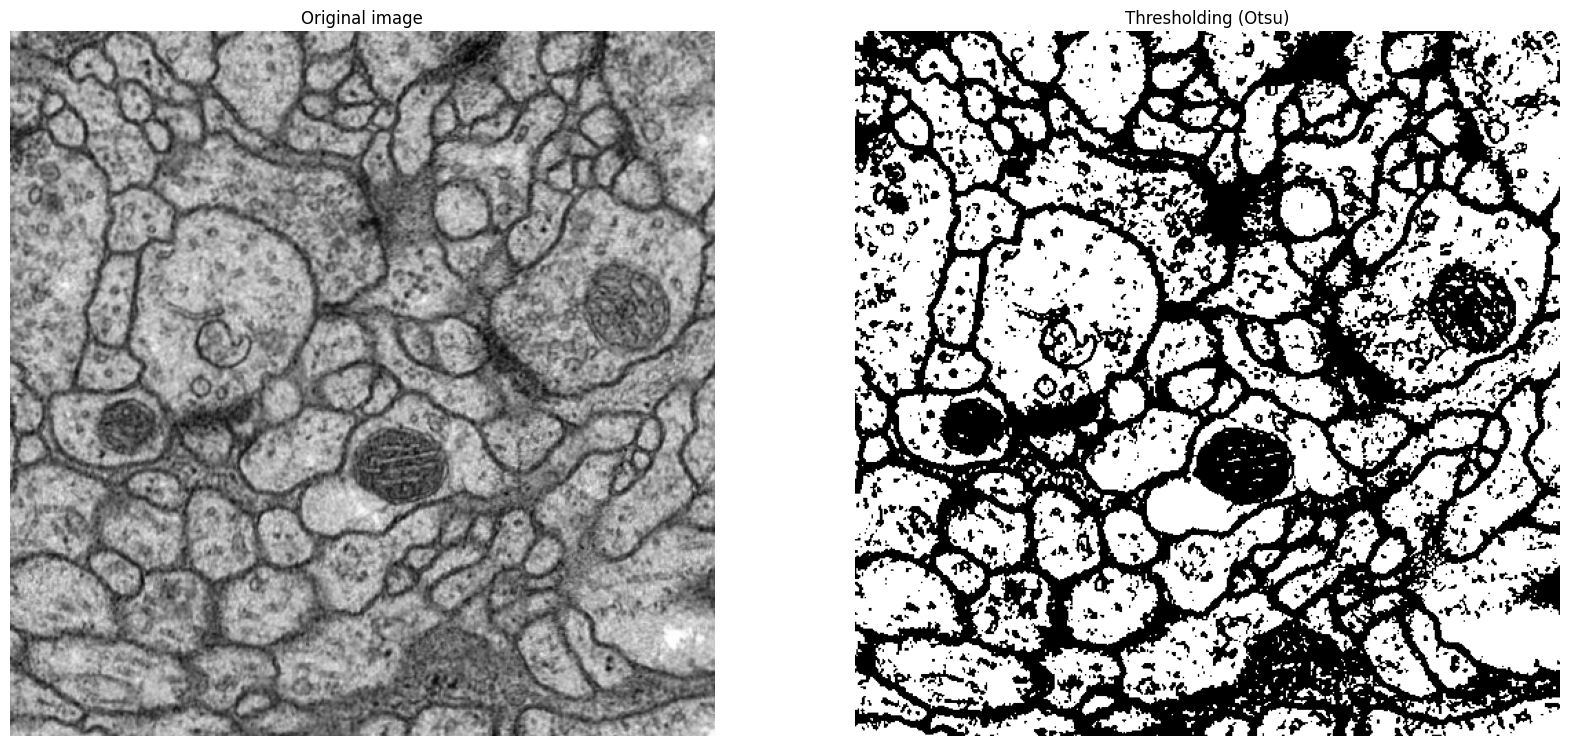

In [4]:
# Determine a good threshold value
thresh = filters.threshold_otsu(img)

# Set to 1 (the rest to 0) all those pixel values larger than thresh
binary_mask = img > thresh

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original image")
axes[0].axis("off")

axes[1].imshow(binary_mask, cmap='gray')
axes[1].set_title("Thresholding (Otsu)")
axes[1].axis("off")
plt.savefig("thresholding.png")
plt.show()